In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("heart.csv")


In [2]:
df.info()
# the above will give information about the dataset what are total columns in ceels such as sex,age,cp.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [3]:
df.describe()
# The df.describe funcation gives a means std count min count of each row 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
print(df.isnull())
#By this we check that there is any null value in dataset 

        age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0     False  False  False     False  False  False    False    False  False   
1     False  False  False     False  False  False    False    False  False   
2     False  False  False     False  False  False    False    False  False   
3     False  False  False     False  False  False    False    False  False   
4     False  False  False     False  False  False    False    False  False   
...     ...    ...    ...       ...    ...    ...      ...      ...    ...   
1020  False  False  False     False  False  False    False    False  False   
1021  False  False  False     False  False  False    False    False  False   
1022  False  False  False     False  False  False    False    False  False   
1023  False  False  False     False  False  False    False    False  False   
1024  False  False  False     False  False  False    False    False  False   

      oldpeak  slope     ca   thal  target  
0       False  Fal

In [5]:
print(df.isnull().sum())
#So there is no null value in dataset as it all show 0 values 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
# now we must check there a duplicate value and drop the dupliactes 
df=df.drop_duplicates()


<Axes: >

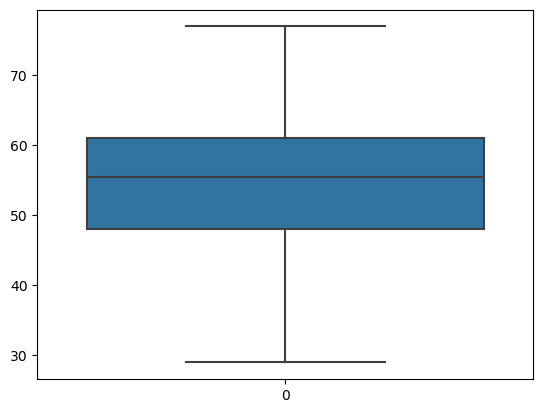

In [7]:
sns.boxplot(df.age)

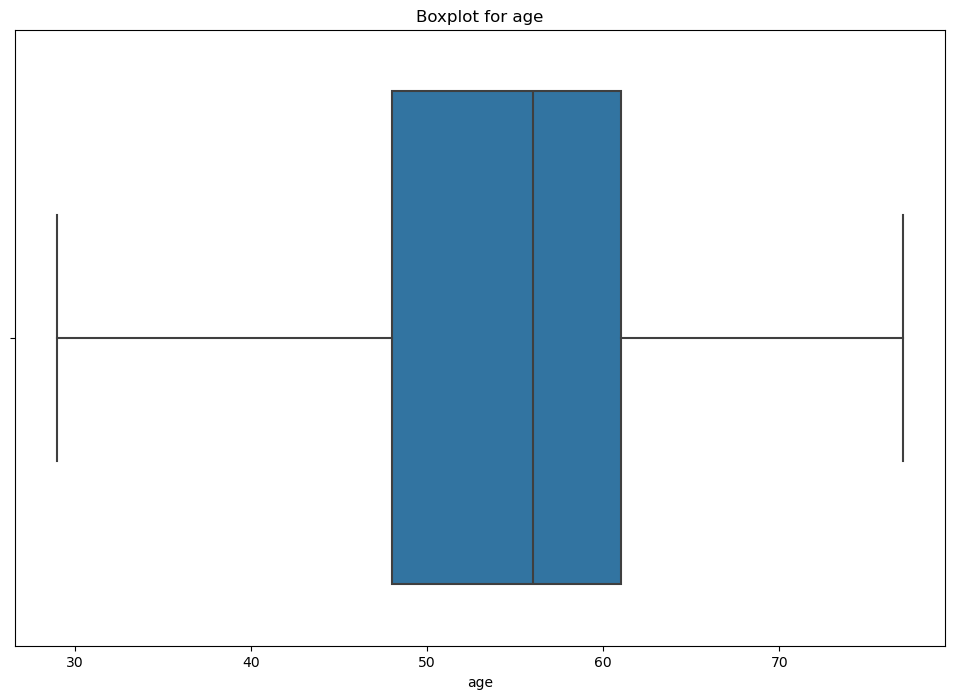

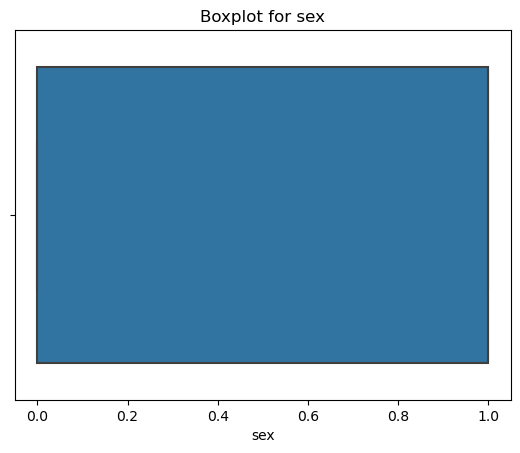

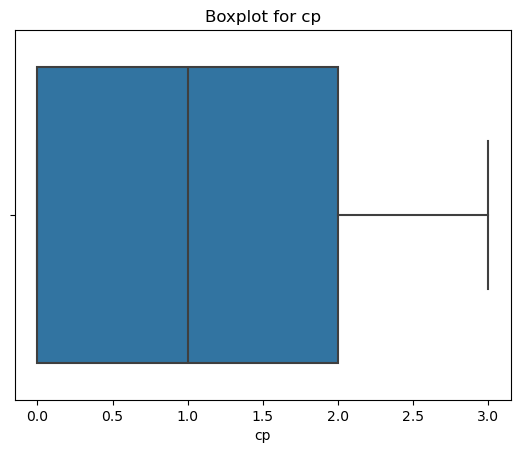

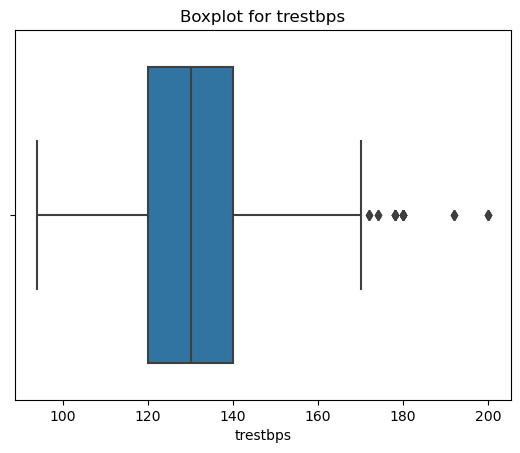

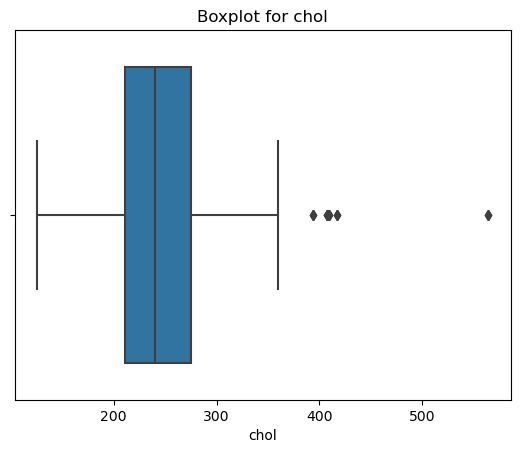

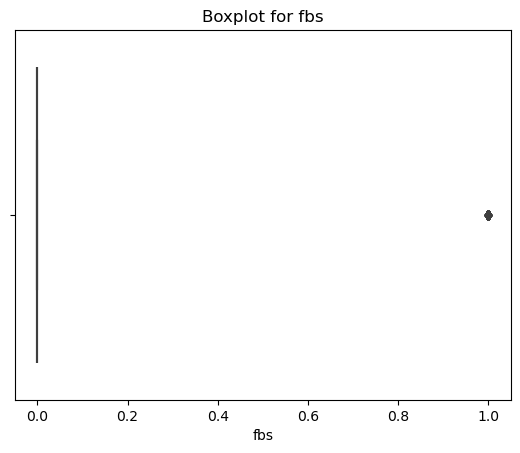

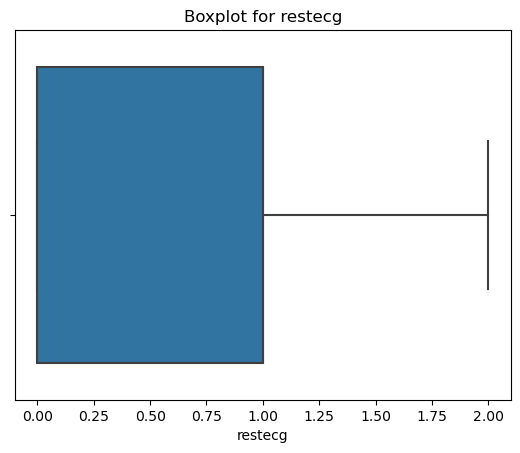

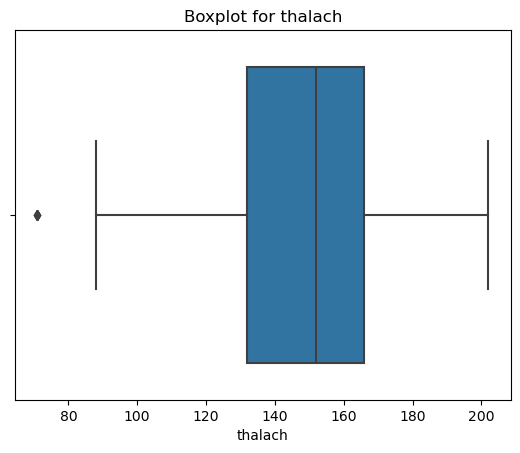

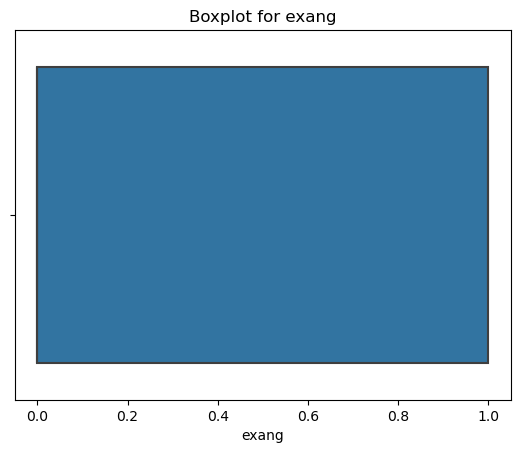

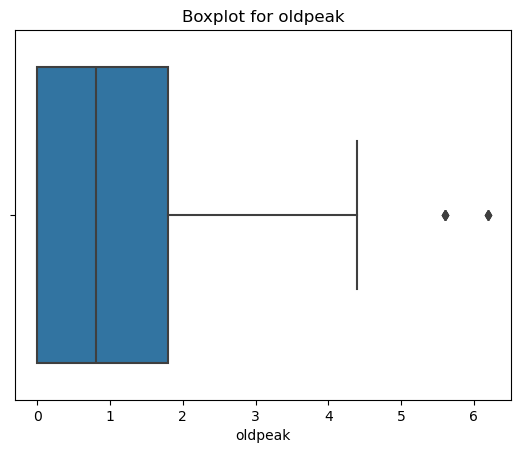

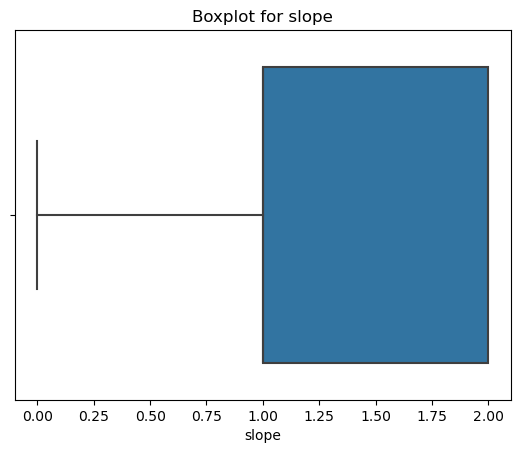

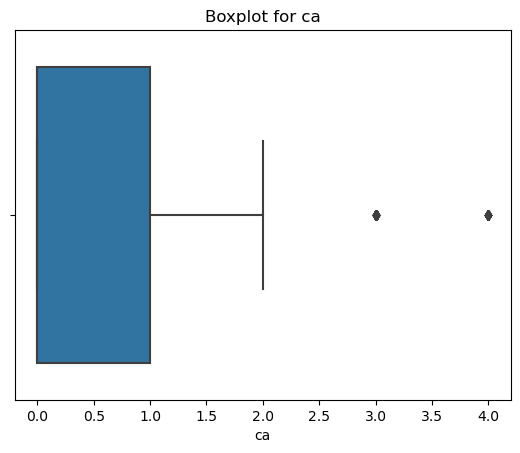

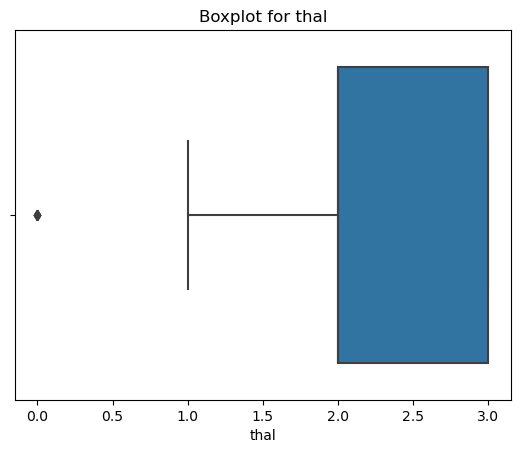

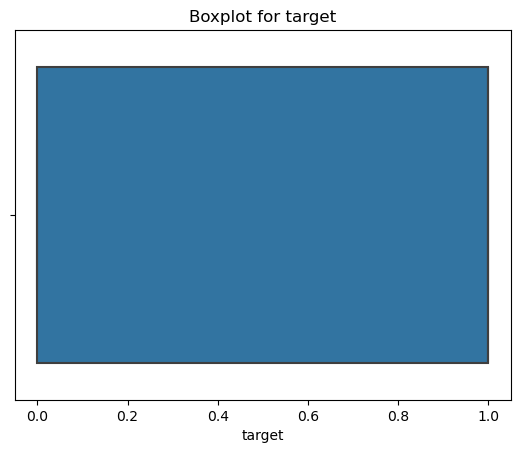

In [34]:
#insted of find the outlier of ecah column we can use direct way 
plt.figure(figsize=(12,8))
for column in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [66]:
#Here we came to know that there is outlier in oldpeak,thalach,chol,trestbps,ca,thal,

In [15]:
# To remove Outlier we use the IQR (inter quratile range)
IQR=df.oldpeak.quantile(0.75)-df.oldpeak.quantile(0.25)
IQR



1.6

In [17]:

lower_limit=df.oldpeak.quantile(0.25)-1.5*IQR
lower_limit
#-2.400000000000004

-2.4000000000000004

In [19]:
upper_limt=df.oldpeak.quantile(0.75)+1.5*IQR
upper_limt
#4.0

4.0

C:\Users\tanis\AppData\Local\Temp\ipykernel_20556\3174468904.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.trimmed=df.loc[~outliers_df]


<Axes: >

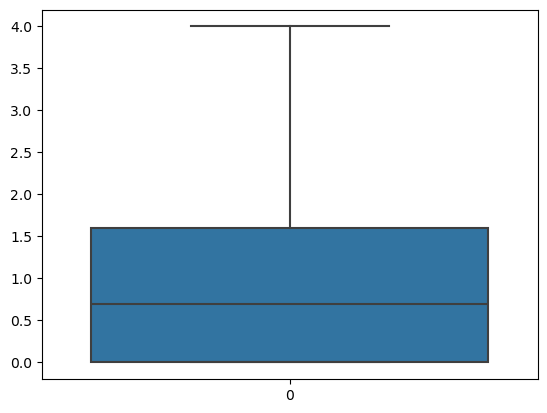

In [21]:
outliers_df=np.where(df.oldpeak>upper_limt,True,
                     np.where(df.oldpeak<lower_limit,True,False))
df.trimmed=df.loc[~outliers_df]
df.shape #(50, 5)
df.trimmed.shape #(48, 5)
sns.boxplot(df.trimmed.oldpeak)

In [98]:
print(df.oldpeak.min())
# The outlier is removed so min valued get changed before that the min values was different 

0.0


In [176]:
print(df.oldpeak.median())

0.8


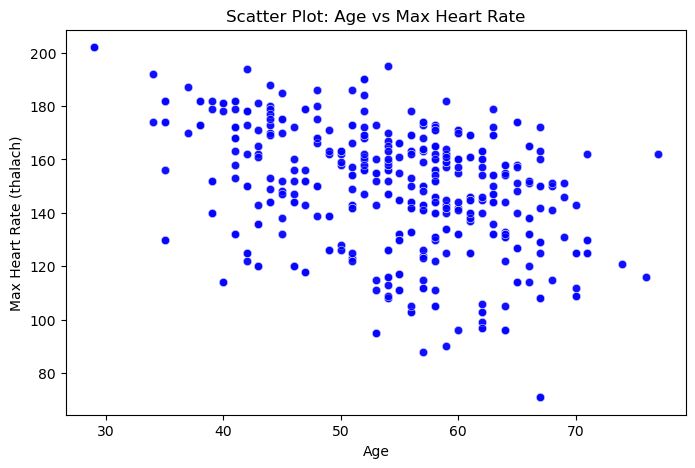

In [137]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['age'], y=df['thalach'], alpha=0.6, color='b')
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (thalach)")
plt.title("Scatter Plot: Age vs Max Heart Rate")
plt.show()
#This is the scatter plot of the Age Vs Max heart Rate 

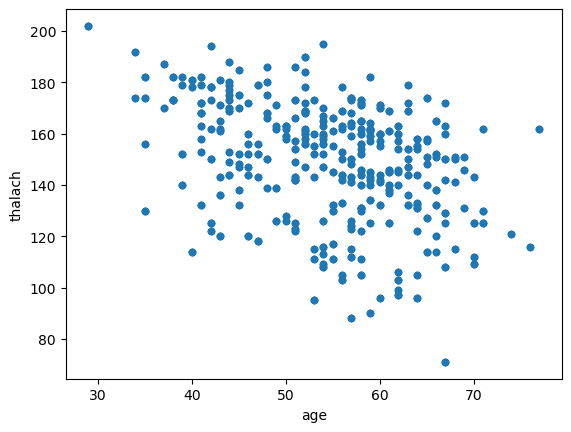

In [122]:
df.plot(kind='scatter',x='age',y='thalach');
plt.show()
#This a simple way for scatter plot

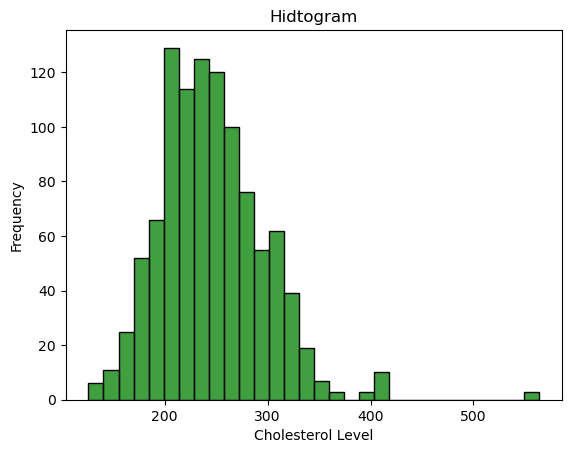

In [44]:

sns.histplot(df['chol'], bins=30,  color='g')
plt.xlabel("Cholesterol Level")
plt.ylabel("Frequency")
plt.title("Hidtogram")
plt.show()

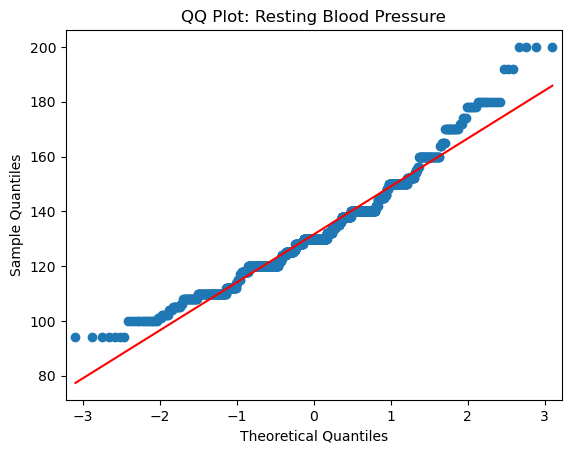

In [130]:
 # QQ Plot for Resting Blood Pressure
import statsmodels.api as sm
sm.qqplot(df['trestbps'], line='s', color='r')
plt.title("QQ Plot: Resting Blood Pressure")
plt.show()

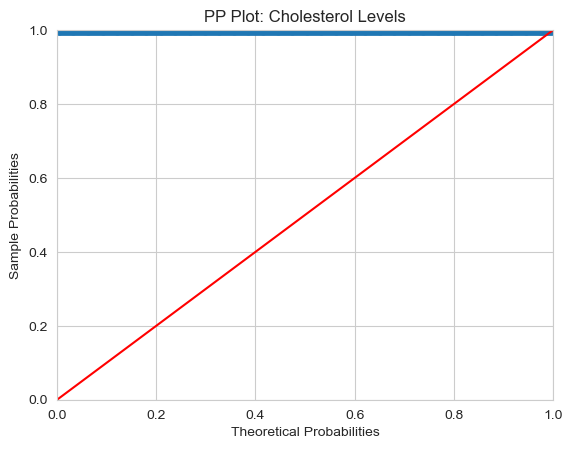

In [189]:
sm.ProbPlot(df['chol'], stats.norm).ppplot(line='45')
plt.title("PP Plot: Cholesterol Levels")
plt.show()


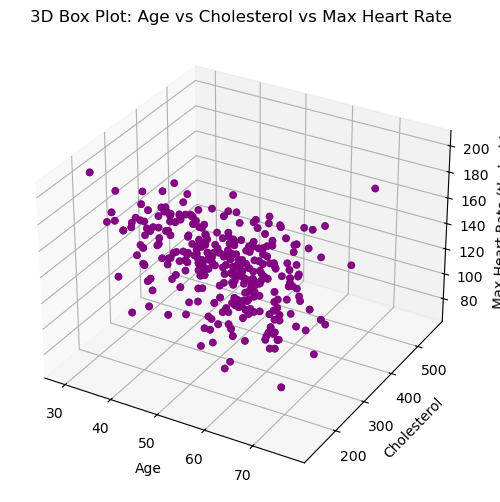

In [141]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['chol'], df['thalach'], c='purple', marker='o', alpha=0.6)

ax.set_xlabel("Age")
ax.set_ylabel("Cholesterol")
ax.set_zlabel("Max Heart Rate (thalach)")
ax.set_title("3D Box Plot: Age vs Cholesterol vs Max Heart Rate")
    
plt.show()

<Axes: title={'center': 'bar graph :age VS trestbps'}, xlabel='age'>

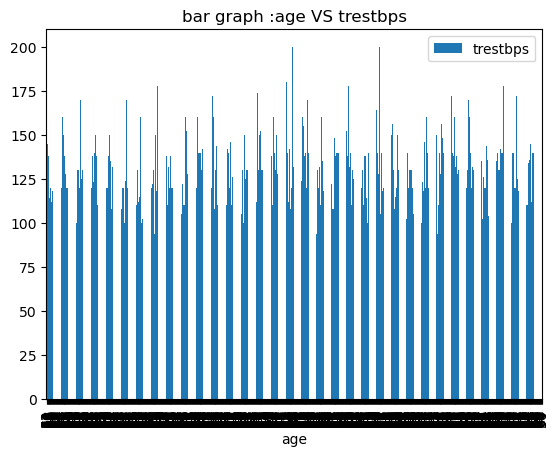

In [5]:
df.plot(x='age',y='trestbps',kind='bar',title="bar graph :age VS trestbps")

In [199]:
df.shape

(1025, 14)

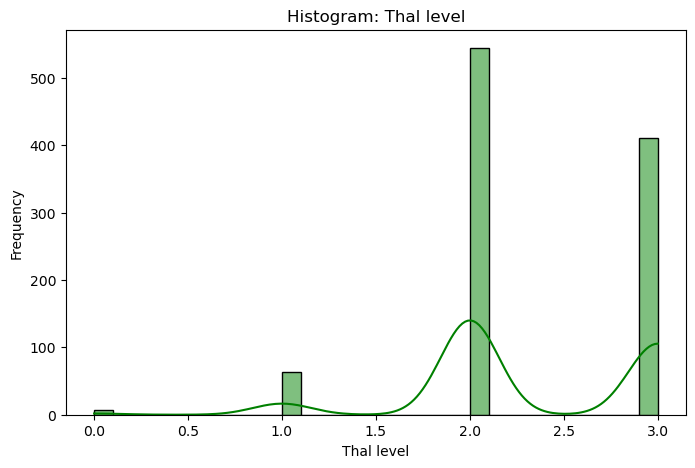

In [49]:
plt.figure(figsize=(8, 5))
sns.histplot(df['thal'], bins=30, kde=True, color='g')
plt.xlabel("Thal level")
plt.ylabel("Frequency")
plt.title("Histogram: Thal level")
plt.show()
#Here This is only the histogram of the cholesterol distribution and we came to know that it is positive 


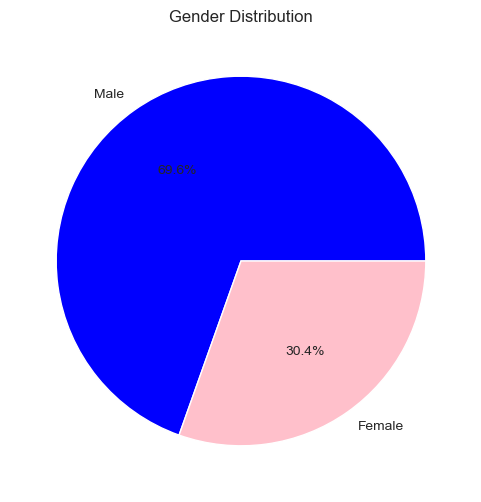

In [187]:
#Pie chart
# Count occurrences of each category in the 'sex' column
sex_counts = df['sex'].value_counts()

# Create Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title("Gender Distribution")
plt.show()


In [7]:
print(df.oldpeak.median())

0.8


In [9]:
print(df.oldpeak.mean())

1.0715121951219515


In [11]:
print(df.age.mean())

54.43414634146342


In [13]:
print(df.cp.mode())

0    0
Name: cp, dtype: int64


In [15]:
print(df.age.mode())

0    58
Name: age, dtype: int64


In [17]:
print(df.age.var())

82.30645007621958


In [19]:
print(df.age.min())

29


In [26]:
print(df.age.std())

9.072290233244281


In [30]:
print(df.var())

age           82.306450
sex            0.211944
cp             1.060160
trestbps     306.835410
chol        2661.787109
fbs            0.127111
restecg        0.278655
thalach      529.263325
exang          0.223514
oldpeak        1.380750
slope          0.381622
ca             1.062544
thal           0.385219
target         0.250071
dtype: float64


In [32]:
print(df.min())

age          29.0
sex           0.0
cp            0.0
trestbps     94.0
chol        126.0
fbs           0.0
restecg       0.0
thalach      71.0
exang         0.0
oldpeak       0.0
slope         0.0
ca            0.0
thal          0.0
target        0.0
dtype: float64


In [34]:
print(df.median())

age          56.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     152.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64


In [36]:
print(df.mode())

    age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  58.0  1.0  0.0     120.0   204  0.0      1.0    162.0    0.0      0.0   
1   NaN  NaN  NaN       NaN   234  NaN      NaN      NaN    NaN      NaN   

   slope   ca  thal  target  
0    1.0  0.0   2.0     1.0  
1    NaN  NaN   NaN     NaN  


In [38]:
print(df.std())

age          9.072290
sex          0.460373
cp           1.029641
trestbps    17.516718
chol        51.592510
fbs          0.356527
restecg      0.527878
thalach     23.005724
exang        0.472772
oldpeak      1.175053
slope        0.617755
ca           1.030798
thal         0.620660
target       0.500070
dtype: float64


In [40]:
print(df.skew())

age        -0.248866
sex        -0.851449
cp          0.529455
trestbps    0.739768
chol        1.074073
fbs         1.971339
restecg     0.180440
thalach    -0.513777
exang       0.692655
oldpeak     1.210899
slope      -0.479134
ca          1.261189
thal       -0.524390
target     -0.052778
dtype: float64


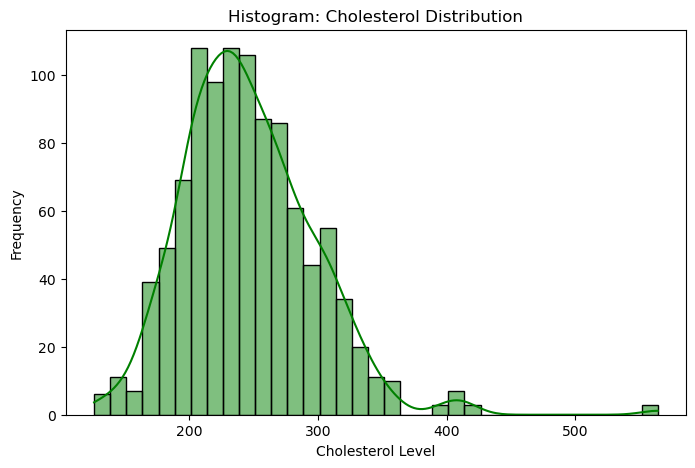

In [63]:
plt.figure(figsize=(8, 5))
sns.histplot(df['chol'],kde=True, color='g')
plt.xlabel("Cholesterol Level")
plt.ylabel("Frequency")
plt.title("Histogram: Cholesterol Distribution")
plt.show()
#Here This is only the histogram of the cholesterol distribution and we came to know that it is positive 


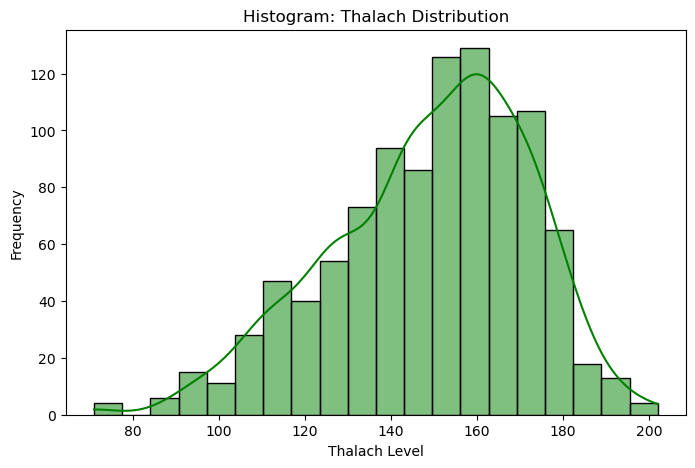

In [61]:
plt.figure(figsize=(8, 5))
sns.histplot(df['thalach'], kde=True, color='g')
plt.xlabel("Thalach Level")
plt.ylabel("Frequency")
plt.title("Histogram: Thalach Distribution")
plt.show()
#Here This is only the histogram of the Thalach distribution and we came to know that it is negative 


In [9]:
cor=df.corr()
print(cor)
#negative menas independent and positive means dependent 

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

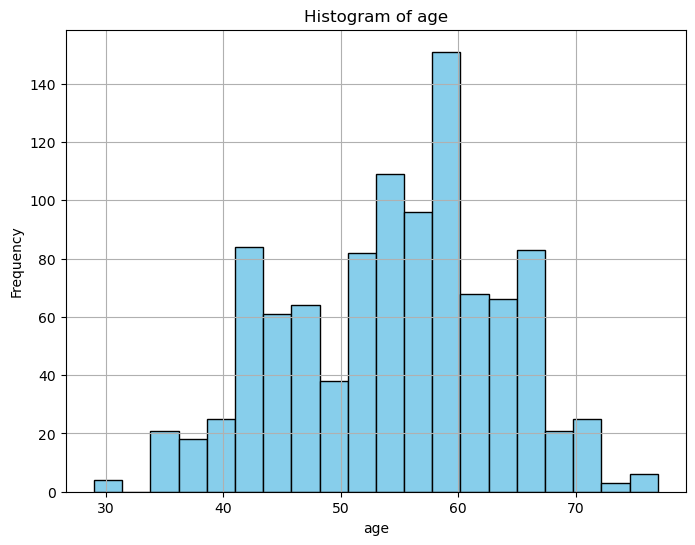

In [38]:

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [28]:
df.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,0.0,120.0,204,0.0,1.0,162.0,0.0,0.0,1.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
